### Anlaytics Objectives :

* To create an analytical and modelling framework to predict whether an Customer is fraudulent or not   based on the quantitative and qualitative features provided in the datasets.
* Specific features that are highly important.

### Attribute details :

* Dataset has large number of columns with many missing values in each columns.

### Target :

* "fraudulent" is a target variable and have to predict either "True", "False"


### Importing requried libraries

In [70]:
import pandas as pd
import numpy as np

In [71]:
import os
PATH = os.getcwd()

In [72]:
print(PATH)

C:\Users\kk\Desktop\Summit_Minds


### Reading the Data

In [73]:
data = pd.read_csv("customersdata.csv")

In [74]:
data.head(5)

,fraudulent,customer/customerEmail,customer/customerPhone,customer/customerDevice,customer/customerIPAddress,customer/customerBillingAddress,orders/0/orderId,orders/0/orderAmount,orders/0/orderState,orders/0/orderShippingAddress,...,transactions/13/transactionId,transactions/13/orderId,transactions/13/paymentMethodId,transactions/13/transactionAmount,transactions/13/transactionFailed,transactions/14/transactionId,transactions/14/orderId,transactions/14/paymentMethodId,transactions/14/transactionAmount,transactions/14/transactionFailed
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\r\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\r\nBrownside, CA 51896",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,nlghpa,45.0,fulfilled,"898 Henry Ports\r\nNew Keithview, CA 95893-2497",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\r\nDavisberg, PR 72250",yk34y2,33.0,failed,"8478 Sean Ridges Apt. 441\r\nDavisberg, PR 72250",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\r\nNortonstad, ...",fbz9ep,34.0,fulfilled,"7769 Elizabeth Bridge Apt. 343\r\nNortonstad, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,148 Russell Lodge Apt. 445\r\nPort Jennifersid...,56h7iw,71.0,fulfilled,148 Russell Lodge Apt. 445\r\nPort Jennifersid...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking shape

In [75]:
data.shape

(168, 188)

In [76]:
data.columns

Index(['fraudulent', 'customer/customerEmail', 'customer/customerPhone',
       'customer/customerDevice', 'customer/customerIPAddress',
       'customer/customerBillingAddress', 'orders/0/orderId',
       'orders/0/orderAmount', 'orders/0/orderState',
       'orders/0/orderShippingAddress',
       ...
       'transactions/13/transactionId', 'transactions/13/orderId',
       'transactions/13/paymentMethodId', 'transactions/13/transactionAmount',
       'transactions/13/transactionFailed', 'transactions/14/transactionId',
       'transactions/14/orderId', 'transactions/14/paymentMethodId',
       'transactions/14/transactionAmount',
       'transactions/14/transactionFailed'],
      dtype='object', length=188)

### Checking for Datatypes

In [77]:
data.dtypes

fraudulent                                              bool
customer/customerEmail                                object
customer/customerPhone                                object
customer/customerDevice                               object
customer/customerIPAddress                            object
customer/customerBillingAddress                       object
orders/0/orderId                                      object
orders/0/orderAmount                                 float64
orders/0/orderState                                   object
orders/0/orderShippingAddress                         object
orders/1/orderId                                      object
orders/1/orderAmount                                 float64
orders/1/orderState                                   object
orders/1/orderShippingAddress                         object
paymentMethods/0/paymentMethodId                      object
paymentMethods/0/paymentMethodRegistrationFailure     object
paymentMethods/0/payment

### Checking for Missing values

In [78]:
data.isnull().mean()

fraudulent                                           0.000000
customer/customerEmail                               0.000000
customer/customerPhone                               0.000000
customer/customerDevice                              0.000000
customer/customerIPAddress                           0.000000
customer/customerBillingAddress                      0.000000
orders/0/orderId                                     0.160714
orders/0/orderAmount                                 0.160714
orders/0/orderState                                  0.160714
orders/0/orderShippingAddress                        0.160714
orders/1/orderId                                     0.309524
orders/1/orderAmount                                 0.309524
orders/1/orderState                                  0.309524
orders/1/orderShippingAddress                        0.309524
paymentMethods/0/paymentMethodId                     0.071429
paymentMethods/0/paymentMethodRegistrationFailure    0.071429
paymentM

* There are large number of missing values in the each columns.
* Taking columns which has less than 10% of missing values is prescribed because imputing the columns which has more missing values will effect the model during prediction.
* Selected columns which has less than 10% of missing values.

In [79]:
impute = data[data.columns[data.isnull().mean() < 0.010]]

In [80]:
print(impute)

     fraudulent               customer/customerEmail customer/customerPhone  \
0         False               josephhoward@yahoo.com           400-108-5415   
1          True               evansjeffery@yahoo.com         1-788-091-7546   
2         False            andersonwilliam@yahoo.com           024.420.0375   
3         False                rubenjuarez@yahoo.com     670.664.8168x94985   
4          True                     uchen@malone.com         1-981-877-0870   
5          True             robinsoncynthia@dunn.com       +65(5)8997489788   
6          True         samuel15@saunders-rhodes.com            05045239487   
7          True                 johnlowery@gmail.com           044-642-9860   
8         False            jameslandry@rodriguez.com     1-885-168-1310x338   
9          True           ubranch@rivera-parker.info     (772)964-8162x6310   
10         True               bowenwilliam@yahoo.com    (128)248-4091x37789   
11        False                 ksummers@hotmail.com

In [81]:
impute.head(2)

,fraudulent,customer/customerEmail,customer/customerPhone,customer/customerDevice,customer/customerIPAddress,customer/customerBillingAddress
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\r\nBrownside, CA 51896"
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...


* There are no missing values in these columns.
* Checking their Data types.

In [82]:
impute.isnull().sum()

fraudulent                         0
customer/customerEmail             0
customer/customerPhone             0
customer/customerDevice            0
customer/customerIPAddress         0
customer/customerBillingAddress    0
dtype: int64

In [83]:
impute.dtypes

fraudulent                           bool
customer/customerEmail             object
customer/customerPhone             object
customer/customerDevice            object
customer/customerIPAddress         object
customer/customerBillingAddress    object
dtype: object

### Visualization library

In [84]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

### Target variable

In [85]:
## count of Target variable
data ['fraudulent'].value_counts()

False    107
True      61
Name: fraudulent, dtype: int64

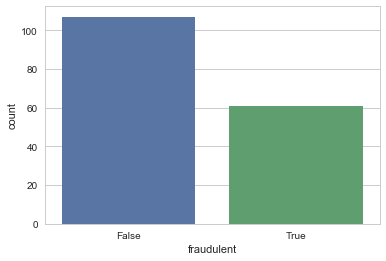

In [86]:
sns.countplot(x="fraudulent",  data = data)
plt.show()

### LabelEncoder

* LabelEncoder is a technique to convert categorical variable to numerical.

In [87]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [88]:
impute['customer/customerEmail'] = label_encoder.fit_transform(impute['customer/customerEmail'])
impute['customer/customerPhone'] = label_encoder.fit_transform(impute['customer/customerPhone'])
impute['customer/customerDevice'] = label_encoder.fit_transform(impute['customer/customerDevice'])
impute['customer/customerIPAddress'] = label_encoder.fit_transform(impute['customer/customerIPAddress'])
impute['customer/customerBillingAddress'] = label_encoder.fit_transform(impute['customer/customerBillingAddress'])

C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

### Columns after Label Encoding

In [89]:
impute.head(2)

,fraudulent,customer/customerEmail,customer/customerPhone,customer/customerDevice,customer/customerIPAddress,customer/customerBillingAddress
0,False,73,115,158,111,87
1,True,48,84,116,48,51


In [90]:
impute.dtypes

fraudulent                          bool
customer/customerEmail             int32
customer/customerPhone             int32
customer/customerDevice            int32
customer/customerIPAddress         int32
customer/customerBillingAddress    int32
dtype: object

### Train & Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = impute.drop('fraudulent', axis = 1)
y = impute['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Checking shape after splitting

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 5)
(51, 5)
(117,)
(51,)


* No null values 

In [94]:
X_train.isnull().sum()

customer/customerEmail             0
customer/customerPhone             0
customer/customerDevice            0
customer/customerIPAddress         0
customer/customerBillingAddress    0
dtype: int64

In [95]:
X_test.isnull().sum()

customer/customerEmail             0
customer/customerPhone             0
customer/customerDevice            0
customer/customerIPAddress         0
customer/customerBillingAddress    0
dtype: int64

* Selecting numerical attributes.

In [96]:
num_attr=X_train.select_dtypes(['int32']).columns
num_attr

Index(['customer/customerEmail', 'customer/customerPhone',
       'customer/customerDevice', 'customer/customerIPAddress',
       'customer/customerBillingAddress'],
      dtype='object')

### Corrplot

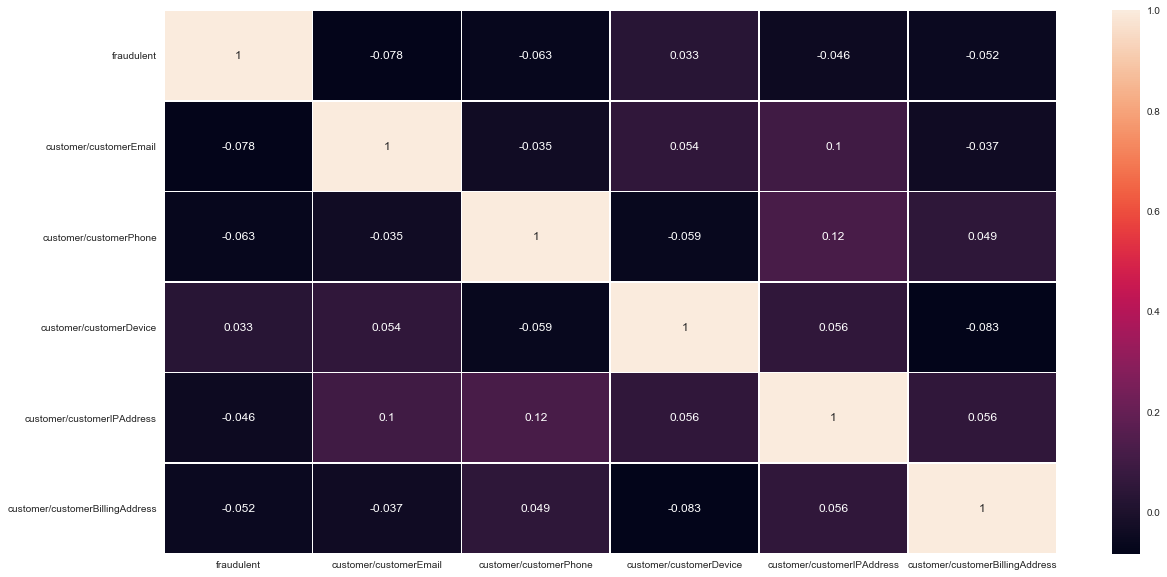

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
corr = impute.corr()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cbar=True)

### StandardScaler

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
scaler.mean_

array([75.02564103, 77.56410256, 83.24786325, 78.4017094 , 81.11111111])

In [101]:
scaler.var_

array([2085.15318869, 2216.50230112, 2479.36591424, 2255.53948426,
       2090.13295347])

In [102]:
X_train[num_attr]=scaler.transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kk\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

### After Standardization

In [103]:
X_train.head(2)

,customer/customerEmail,customer/customerPhone,customer/customerDevice,customer/customerIPAddress,customer/customerBillingAddress
29,-1.051730,1.007565,0.256102,-1.440263,-0.593008
35,-1.402119,1.028805,0.135604,-0.429577,0.981865


In [104]:
X_test.head(2)

,customer/customerEmail,customer/customerPhone,customer/customerDevice,customer/customerIPAddress,customer/customerBillingAddress
63,-0.504246,0.561513,0.195853,-0.471689,-0.243036
86,-0.438548,0.582754,-1.430874,-0.008458,1.156851


### Model Building

### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [106]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\kk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       False       0.72      0.89      0.80        38
        True       0.00      0.00      0.00        13

    accuracy                           0.67        51
   macro avg       0.36      0.45      0.40        51
weighted avg       0.54      0.67      0.60        51

[[34  4]
 [13  0]]
0.6666666666666666


### Heatmap of Confusion Matrix

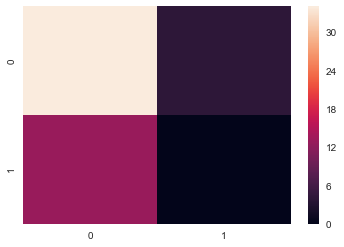

In [108]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

### Naive Bayes Classifier

In [109]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_gnb = gnb.predict(X_test)

In [110]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_gnb))

Accuracy: 0.6470588235294118


###  Build Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
y_pred = clf.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.76      0.75        38
        True       0.25      0.23      0.24        13

    accuracy                           0.63        51
   macro avg       0.50      0.50      0.50        51
weighted avg       0.62      0.63      0.62        51

[[29  9]
 [10  3]]
0.6274509803921569


In [115]:
clf.feature_importances_

array([0.23568142, 0.20983488, 0.21117387, 0.12278033, 0.2205295 ])

In [116]:
importances = clf.feature_importances_
indices = np.argsort(importances)
print(indices)
pd.DataFrame([X_train.columns[indices],np.sort(importances)])

[3 1 2 4 0]


,0,1,2,3,4
0,customer/customerIPAddress,customer/customerPhone,customer/customerDevice,customer/customerBillingAddress,customer/customerEmail
1,0.12278,0.209835,0.211174,0.220529,0.235681


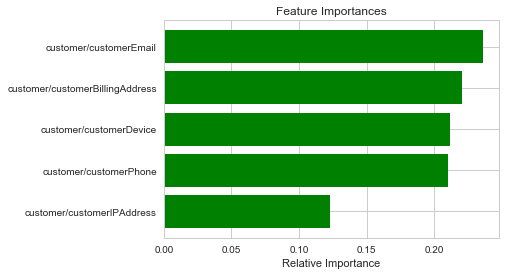

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='g')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### GridSearch

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}


In [50]:
%%time
clf_1 = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5)
clf_1.fit(X_train, y_train)

Wall time: 10min 45s


C:\Users\kk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
y_pred_gs = clf_1.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_gs))
print(confusion_matrix(y_test, y_pred_gs))
print(accuracy_score(y_test, y_pred_gs))

              precision    recall  f1-score   support

       False       0.73      0.84      0.78        38
        True       0.14      0.08      0.10        13

    accuracy                           0.65        51
   macro avg       0.44      0.46      0.44        51
weighted avg       0.58      0.65      0.61        51

[[32  6]
 [12  1]]
0.6470588235294118
